# Spaceship Titanic
Predict which passengers are transported to an alternate dimension

# 0.Data Load

In [1]:
import io

import pandas as pd # data processing, csv file 
import numpy as np # linear algebra 
import seaborn as sns # visualization

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpathches  

import tensorflow as tf 

In [2]:
# upload 3 files (train, test, sample_submission) after pressing 'Choose Files' button
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (5).csv
Saving test.csv to test (5).csv
Saving train.csv to train (5).csv


## 0.1 Train.csv
1. Description
    - Personal record for about two-thirds (~8,700) of th passengers, to be used as training data 
2. features
    - `PassengerId`: a unique id for each passenger
        - form: `gggg_pp`
        - `gggg`: a group the passenger is traveling with 
        - `pp`: number within the group
            - often family  members, but not always
        - same with train_df and test_df
    - `HomePlanet`: planet the passenger departed from
    - `CryoSleep`: whether the passenger elected to be put into suspended animation during voyage 
        - ***Passengers in cryosleep are confined to their cabins ***
    - `Cabin`: cabin number where ther passengers is staying 
        - form: `deck/num/side`
            - `side`: `P`(Port) OR `S`(Starboard)
    - `Destination`: planet the passenger will be debarking to 
    - `Age`: passenger age
    - `VIP`: whether the passenger has paid for special VIP service during the voyage
    - `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: amount the passenger has billed at each of the luxury amenities
    - `Name`: first/last names of the passenger
    - `Transported`: whether the passenger was transported to another dimension
        - TARGET LABEL to PREDICT 
            - TRUE or FALSE

In [3]:
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# Name: Not useful for analyiss ==> DROP the COLUMN
train_df = train_df.drop(columns=['Name'])

train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


## 0.2 Test.csv

In [4]:
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Name: Not useful for analyiss ==> DROP the COLUMN
test_df = test_df.drop(columns=['Name'])
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


# 1.Preprocessing 

## 1.1 EDA
1. `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: payment for luxury
    - Big gap between MEAN and MEDIAN 
    - Big gap between MEAN and MAX 
    - RESULT
        - ***need 1) scaling 2) outlier replacement*** 

2. correlation with Label
    - `CryoSleep` and label(`Transported`) = 0.46
    - luxury features(`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`) showed low correlations with label(`Transported`)==> MERGE THEM 

In [5]:
# NULL --> misisng values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [6]:
# luxury --> outliers  
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


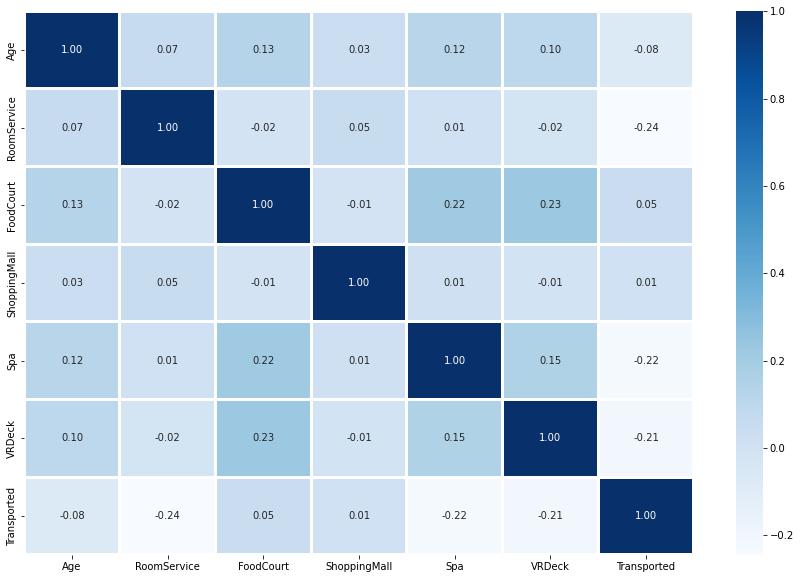

In [7]:
# heatmap for visaulizing correlation  betwween features
corr = train_df.corr()  # correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', linewidths=2);

## 1.2 Missing Values 
- replace missing values(Null) with 
    - categorical --> MODE
        - `HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `VIP`
    - float --> MEDIAN 

In [8]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [9]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [10]:
# 1) categorical values --> replace NULL with MODE
null_obj = ['HomePlanet','CryoSleep','Cabin', 'Destination', 'VIP']
for col in null_obj:
                       # mode()[0] <-- [0] INDEXING is important! 
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])  
train_df.isnull().sum()   

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [11]:
# 2) remaining float values --> replace NULL with MEDIAN 
## finally, there's no NULL values
train_df.fillna(train_df.median(), inplace=True)
train_df.isnull().sum()

<ipython-input-11-8aa279722391>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.fillna(train_df.median(), inplace=True)


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [12]:
# for test_df null values
null_obj = ['HomePlanet','CryoSleep','Cabin', 'Destination', 'VIP']
for col in null_obj:
                       # mode()[0] <-- [0] INDEXING is important! 
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])  
test_df.fillna(test_df.median(), inplace=True)
test_df.isnull().sum()

<ipython-input-12-7416cd22e472>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df.fillna(test_df.median(), inplace=True)


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

## 1.3 Split & Merge columns
1. Split: `Cabin`, `PassengerId` is consisted of two more elements, so split them and DROP original columns
    - `PassengerId`: a unique id for each passenger
        - form: `gggg_pp`
        - `gggg`: a group the passenger is traveling with 
        - `pp`: number within the group
            - often family  members, but not always
        - same with train_df and test_df
    - `Cabin`: cabin number where ther passengers is staying 
        - form: `deck/num/side`
            - `side`: `P`(Port) OR `S`(Starboard)

2. Merge: luxury payments
    - `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: payment for luxury



In [13]:
# 1) split `PassengerID` column & DROP original column
# in train_df
hyphen = train_df['PassengerId'].str.split('_')
train_df['Group'] = hyphen.map(lambda hyphen: hyphen[0]) # Group No. --> DROP
train_df['Num_GroupMember'] = hyphen.map(lambda hyphen: hyphen[1])
train_df = train_df.drop(columns=['PassengerId', 'Group'])  

# in test_df
hyphen = test_df['PassengerId'].str.split('_')
test_df['Group'] = hyphen.map(lambda hyphen: hyphen[0]) # Group No. --> DROP
test_df['Num_GroupMember'] = hyphen.map(lambda hyphen: hyphen[1])
test_df = test_df.drop(columns=['PassengerId', 'Group'])  

train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num_GroupMember
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,01
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,01
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,01
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,01


In [14]:
# 2) split `Cabin` column * DROP original column
# in train_df
slash = train_df['Cabin'].str.split('/')
train_df['Deck'] = slash.map(lambda slash: slash[0])
train_df['Num'] = slash.map(lambda slash: slash[1]) # Cabin No. --> DROP
train_df['Side'] = slash.map(lambda slash: slash[2])
train_df = train_df.drop(columns=['Cabin', 'Num'])

# in test_df
slash = test_df['Cabin'].str.split('/')
test_df['Deck'] = slash.map(lambda slash: slash[0])
test_df['Num'] = slash.map(lambda slash: slash[1]) # Cabin No. --> DROP
test_df['Side'] = slash.map(lambda slash: slash[2])
test_df = test_df.drop(columns=['Cabin', 'Num'])

train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num_GroupMember,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,01,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,01,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,02,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,01,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,01,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,01,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,01,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,01,E,S


In [15]:
# 3) luxury payment columns --> MERGE 
# in train_df
train_df['Luxury_pay'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
train_df = train_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], 
                         axis=1) # drop COLUMN (axis=0: drop ROWS)

# in test_df
test_df['Luxury_pay'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']
test_df = test_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], 
                         axis=1) # drop COLUMN (axis=0: drop ROWS)

train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Num_GroupMember,Deck,Side,Luxury_pay
0,Europa,False,TRAPPIST-1e,39.0,False,False,01,B,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,True,01,F,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,False,01,A,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,False,02,A,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,True,01,F,S,1091.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False,01,A,P,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,False,01,G,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,True,01,G,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,False,01,E,S,4637.0


## 1.4 Scaling
- Normalization (min 0, max 1) 
- Standarization (standard deviation 1)

### 1.4.1 outlier
- Didn't delet outliers

In [16]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Num_GroupMember,Deck,Side,Luxury_pay
0,Europa,False,TRAPPIST-1e,39.0,False,False,01,B,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,True,01,F,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,False,01,A,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,False,02,A,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,True,01,F,S,1091.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False,01,A,P,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,False,01,G,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,True,01,G,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,False,01,E,S,4637.0


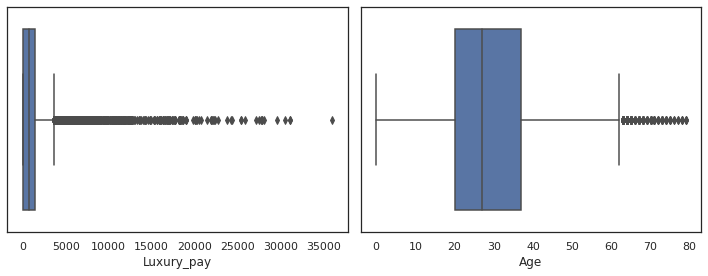

In [17]:
def dist_outliers(col_a, col_b):
    sns.set_theme(style="white")
    fig , axs = plt.subplots(nrows=1 , ncols=2 , figsize=(10,4)  )

    sns.boxplot(data=train_df , x=col_a, ax=axs[0])
    sns.boxplot(data=train_df , x=col_b, ax=axs[1])
    plt.tight_layout()

dist_outliers('Luxury_pay', 'Age')

# 1) Luxury_pay: ALL ZERO payment in 1Q~3Q --> standard for outlier isn't specific
# 2) Age: over 3Q = 60 ~ --> old people is meaningful observations  

### 1.4.2 Standarization

- Scaling: 
    * 주로 데이터의 feature scaling(data scaling)을 위한 방법
    * 알고리즘을 학습시킬 때 단위가 다른 feature들이 **모두 유사한 범위를 갖도록 단위를 변환**해주는 기술

1. 표준화 (Standardization)
    * 평균 0, 표준편차 1을 갖는 표준정규분포로 변환
    * 범위가 균일하게 바뀌지는 않음 (특정 범위로 제한되지 않음)
    * `sklearn.preprocessing.StandardScaler`
    \begin{equation}
x_i^{'} = \frac{x_i-mean(x)}{std(x)}
\end{equation}

2. 정규화(normalization)
    * 0과 1사이 값으로 변환
    * 각 feature별로 최소값은 0, 최대값은 1로 변환
    * `sklearn.preprocessing.MinMaxScaler`
    \begin{equation}
x_i^{'} = \frac{x_i-min(x)}{max(x)-min(x)}
\end{equation}

- Scaling 방법 선택     
    * 표준화와 정규화는 데이터마다 더 적합한 방식이 서로 다름
    * 모형의 성능 검증을 통해 판단
* scaler 지정 후 `fit()`, `transform()`, `fit_transform()`을 이용하여 스케일링 진행

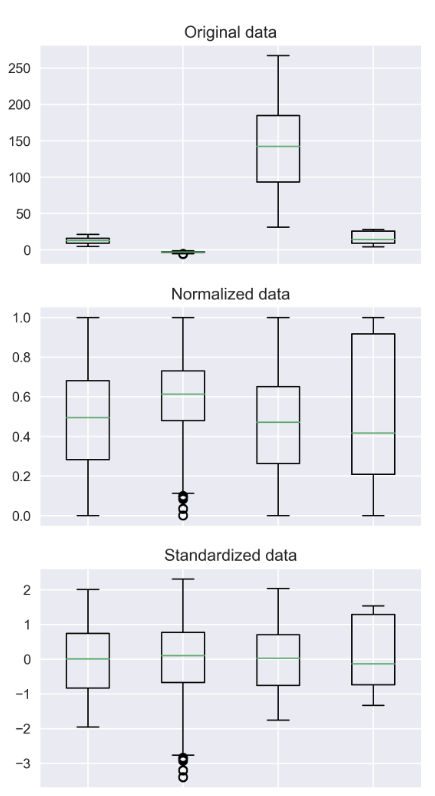
<center><small>출처: https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization, https://heeya-stupidbutstudying.tistory.com/entry/%ED%86%B5%EA%B3%84-%EC%A0%95%EA%B7%9C%ED%99%94%EC%99%80-%ED%91%9C%EC%A4%80%ED%99%94</small></center>


In [18]:
# Standarization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_df[['Age', 'Luxury_pay']] = scaler.fit_transform(train_df[['Age', 'Luxury_pay']])
# test_df[['Age', 'Luxury_pay']] = scaler.fit_transform(test_df[['Age', 'Luxury_pay']])
# train_df.describe()

In [19]:
# Normalization
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train_df[['Age', 'Luxury_pay']] = scaler.fit_transform(train_df[['Age', 'Luxury_pay']])
# train_df.describe()

## 1.5 Encoding

In [20]:
train_df.dtypes

HomePlanet          object
CryoSleep             bool
Destination         object
Age                float64
VIP                   bool
Transported           bool
Num_GroupMember     object
Deck                object
Side                object
Luxury_pay         float64
dtype: object

In [21]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Deck', 'Side']
for i in col: 
    train_df[i] = encoder.fit_transform(train_df[i])

for i in col:
    if i == 'Transported': 
        pass
    else:
        test_df[i] = encoder.fit_transform(test_df[i])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8693 non-null   int64  
 1   CryoSleep        8693 non-null   int64  
 2   Destination      8693 non-null   int64  
 3   Age              8693 non-null   float64
 4   VIP              8693 non-null   int64  
 5   Transported      8693 non-null   int64  
 6   Num_GroupMember  8693 non-null   object 
 7   Deck             8693 non-null   int64  
 8   Side             8693 non-null   int64  
 9   Luxury_pay       8693 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 679.3+ KB


# 2.Modeling

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, f1_score


In [23]:
# split data 
X = train_df.drop('Transported', axis=1).values
y = train_df.iloc[:,[5]].values

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=2023)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8693, 9) (8693, 1)
(6954, 9) (1739, 9)
(6954, 1) (1739, 1)


## 2.1 LogisticRegression
- BINARY CLASSIFICATION: logistic regression
    - activation funciton: sigmoid
    - cost funciton: Cross-entropy

In [24]:
from sklearn.linear_model import LogisticRegression 
LR_model =LogisticRegression()
LR_fitted = LR_model.fit(X_train, y_train)

LR_predict = tf.cast(LR_model.predict(X_test) > 0.5,  # tf.cast: casts a tensor to new type 
                      dtype = tf.float32)

print('Accuracy = ', accuracy_score(LR_predict, y_test))
print('Report = \n', classification_report(LR_predict, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy =  0.6848763657274296
Report = 
               precision    recall  f1-score   support

         0.0       0.73      0.66      0.69       942
         1.0       0.64      0.72      0.68       797

    accuracy                           0.68      1739
   macro avg       0.69      0.69      0.68      1739
weighted avg       0.69      0.68      0.69      1739



### 2.1.1 hyper-parameter
Logistic Regression modeling with Hyper-parameter tuning 
- Hyper-parameters:
    1. in ML model: learning rate, optimizer
    2. in DL, also need: epochs, actvation function, number of layer, number of neuron etc. 

In [25]:
# 1) Parameter Initialization
tf.random.set_seed(22)

W = tf.Variable(tf.random.normal([9, 1], mean=0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

In [26]:
# 2) Hypothesis: define relationship between FEATURE and LABEL 
### binary classification --> Logistic Regression 
def hypothesis(x):
    z = tf.matmul(x,W) + b
    sigmoid = 1/(1+tf.exp(-z))
    return sigmoid

In [27]:
# 3) Cost function 
## Cross Entropy: logistic regression's loss function  
def cost_function(H,Y):
    cost = tf.reduce_mean(Y * tf.math.log(H) + (1-Y)*tf.math.log(1-H))
    return cost 

In [28]:
# 4) Metric (can use accuracy metrics from importing metrics library)
def accuracy(hypo, label):
    predicted = tf.cast(hypo>0.5, dtype=tf.float32)  # 1 OR 0 according to fraud OR otherwise

    # if predict, label(true) are same --> add 1, different --> add 0 
    ## reduce_mean: reduces input_tensor along the dimensions given in axis 
    ###             by computing the mean of elements across the dimensions in axis
    accuracyd = tf.reduce_mean(tf.cast(tf.equal(predicted, label), 
                                       dtype=tf.float32)) 
    return accuracyd

In [29]:
# 5) Hyper-Parameter Setting 
learning_rate = 0.00000001
optimizer = tf.optimizers.SGD(learning_rate)

In [30]:
# 6) Training 
for step in range(2022):
    with tf.GradientTape() as g:
        pred = hypothesis(X) 
        cost = cost_function(pred, y)

        gradients = g.gradient(cost, [W, b])

    optimizer.apply_gradients(zip(gradients, [W,b]))

    if step % 200 == 0:
        print(f'step: {step}, loss: {cost.numpy()}')

    w_hat = W.numpy()
    b_hat = b.numpy()

predicted_x = tf.cast(hypothesis(X) > 0.5,  
                      dtype = tf.float32)
acc_LRhype = accuracy(hypothesis(X), y).numpy()
print(f'Accuracy: {acc_LRhype}')

step: 0, loss: nan
step: 200, loss: nan
step: 400, loss: nan
step: 600, loss: nan
step: 800, loss: nan
step: 1000, loss: nan
step: 1200, loss: nan
step: 1400, loss: nan
step: 1600, loss: nan
step: 1800, loss: nan
step: 2000, loss: nan
Accuracy: 0.4963763952255249


## 2.2 Support Vector Machine
support vector classifier

In [31]:
from sklearn.svm import SVC 

# Support Vector Classifier 
SVC_model = SVC(kernel='rbf')  
SVC_model.fit(X_train, y_train) 

SVC_predict = tf.cast(SVC_model.predict(X_test) > 0.5,  # tf.cast: casts a tensor to new type 
                      dtype = tf.float32)

print('Accuracy = ', accuracy_score(SVC_predict, y_test))
print('Report = \n', classification_report(SVC_predict, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.730879815986199
Report = 
               precision    recall  f1-score   support

         0.0       0.81      0.69      0.75       996
         1.0       0.65      0.78      0.71       743

    accuracy                           0.73      1739
   macro avg       0.73      0.74      0.73      1739
weighted avg       0.74      0.73      0.73      1739



# 3.Ensemble Modeling
- didn't use Early Stopping --> use very dataset as training data (no validation set) 
1. Ensemble Model
    - 1) Bagging:
        - training a bunch of individual models in a PARALLEL way. 
        - each model is trained by a random subset of the data
        - ex) ***Random forest***

    - 2) Boosting: 
        - training a bunch of individual models in a SEQUENTIAL way 
        - each individual model learns from mistakes made by the previous model
        - ex) ***XGBoost, LGBM***

2. ML
    - 100,000~999,999 data size --> ML is more effective
    - more base of Math & Stats than DL


## 3.1 Random Forest
ensemble model using ***1) bagging*** as the ensemble model and ***2) decision trees*** as the individual model 
- Process 
1. select n random subsets from the traininig set
2. train each decision tree
3. each individual tree predicts the records/candidates in the test set, independently 
4. Make the final prediction
    - for each candiidate in the test set, Random Forest uses the class (e.g. cat OR dog) with the ***majority vote*** as this candidate's final prediction

In [32]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators = 10,
                                            oob_score=False)
RandomForest_model.fit(X_train, y_train)
RF_predict = tf.cast(RandomForest_model.predict(X_test) > 0.5, 
                     dtype = tf.float32)

print('Accuracy = ', accuracy_score(RF_predict, y_test))
print("Test Report = \n", classification_report(RF_predict, y_test))

Accuracy =  0.706728004600345
Test Report = 
               precision    recall  f1-score   support

         0.0       0.78      0.67      0.72       978
         1.0       0.64      0.75      0.69       761

    accuracy                           0.71      1739
   macro avg       0.71      0.71      0.71      1739
weighted avg       0.72      0.71      0.71      1739



<ipython-input-32-b36e53f76728>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


## 3.2 XGboost (XGB)
1. GBDT(Gradient Boosting Decision Tree)
    -  ensemble algorihthm
    - fits boosted decision trees by minimizing an error gradient 
        - new models are created that predict the residuals(errors) of prior models
        - added together to make the final prediction 
        - use ***gradient descent algorithm*** to minimize the loss when adding new models 
    - effective implementations: XGBoost, LightGBM, pGBRT

2. GBDT process
    - 1) train a decision tree
    - 2) apply the decision tree just trained to predict 
    - 3) calculate the residual of this decision tree, Save residual errors as the new Y 
    - 4) repeat step-1 
    - 5) make the final prediction 
        - (=) SUM of prediction of tree 1, tree 2, ..., tree n 
        - GB makes a new prediction by simply adding up the predictions of all trees. 

3. XGBoost
    - Extreme Gradient Boosting 
        - provides an efficient implementation of the gradient boosting algorithm 
    - benefit: 
        - ***computation efficiency***
        - better model performance





In [33]:
# hyperparameter setting isn't needed. 
from xgboost import XGBClassifier

Xgboost_model = XGBClassifier()
Xgboost_model.fit(X_train, y_train, eval_metric='aucpr')

Xg_predict = tf.cast(Xgboost_model.predict(X_test) > 0.5, 
                     dtype = tf.float32)

print('Accuracy = ', accuracy_score(Xg_predict, y_test))
print('Test Report = \n', classification_report(Xg_predict, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.7377803335250144
Test Report = 
               precision    recall  f1-score   support

         0.0       0.83      0.69      0.75      1010
         1.0       0.65      0.80      0.72       729

    accuracy                           0.74      1739
   macro avg       0.74      0.75      0.74      1739
weighted avg       0.75      0.74      0.74      1739



## 3.3 Light Gradient Boosting (LGBM)
1. Light GBM
    - gradient boosting framework that uses tree-based learning algorithms 
    - Benefit:
        - training speed --> LIGHT 
        - higher efficiency
            - take lower memory to run  
        - ***BETTER ACCURACY***
        - capable of handling large-scale data 
    - focus on SPEED rather than PERFORMANCE

In [34]:
# hyperparameter - sensitive to setting
## ==> setting is recommended.
from lightgbm import LGBMClassifier

LGBM_model = LGBMClassifier()
LGBM_model.fit(X_train, y_train, eval_metric = 'aucpr') 

LGBM_predict = tf.cast(LGBM_model.predict(X_test) > 0.5, 
                       dtype = tf.float32)

print('Accuracy = ', accuracy_score(LGBM_predict, y_test))
print('Test Report = \n', classification_report(LGBM_predict, y_test))

Accuracy =  0.745830937320299
Test Report = 
               precision    recall  f1-score   support

         0.0       0.85      0.69      0.77      1042
         1.0       0.64      0.82      0.72       697

    accuracy                           0.75      1739
   macro avg       0.75      0.76      0.74      1739
weighted avg       0.77      0.75      0.75      1739



/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 4.Model Comparison

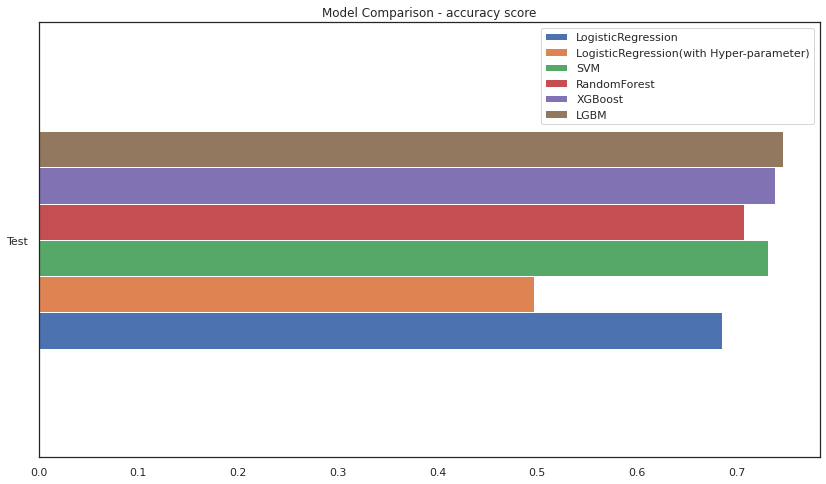

In [35]:
acc_dict={}
algorithms = {'LogisticRegression':LR_predict, 
              'LogisticRegression(with Hyper-parameter)': acc_LRhype,
              'SVM':SVC_predict, 
              'RandomForest':RF_predict, 
              'XGBoost':Xg_predict, 
              'LGBM':LGBM_predict}


def compare_algorithms(algo, y_predict):
    if algo == 'LogisticRegression(with Hyper-parameter)': 
        acc_dict[algo] = acc_LRhype
    else: 
        acc_dict[algo] = {'Test': accuracy_score(y_predict, y_test)} 
    
for algo in algorithms:
   compare_algorithms(algo, algorithms[algo])
   ACC_df = pd.DataFrame(acc_dict)

ACC_df.plot(kind = 'barh', figsize=(14,8), 
           title='Model Comparison - accuracy score');

# 5.Inference

In [36]:
test_x = np.array(test_df, dtype=np.float32)
selected_model = SVC_model

preds = tf.cast(selected_model.predict(test_x) > 0.5, dtype = 'bool')
preds

<tf.Tensor: shape=(4277,), dtype=bool, numpy=array([ True, False,  True, ...,  True, False,  True])>

# 6.Submission

In [37]:
submit = pd.read_csv('sample_submission.csv')
test_df = pd.read_csv('test.csv')

submit = pd.DataFrame({'PassengerId': test_df['PassengerId'], # recall DROPPED Column
                       'Transported': preds})
submit

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [38]:
submit.to_csv('spaceshipTitanic_submission.csv', index=False)

# THE END